# Лабораторная работа №1. Нежесткие системы ОДУ.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Исходная система: 
$ x' = z, \quad z' = e(1-x^2)z -x $\
$ x(0) = 2, \quad z(0) = 0, \quad t \in (0;100] $

### Первый интеграл этой системы:
$ I = x^2 + (z - \frac{e x}{3} \cdot (3 - x^2))^2 = const $

В данной лабораторной работе будем решать указанную систему (нежесткую) при помощи явных методов Рунге-Кутты (1-4 порядок, одношаговый, многостадийный), Адамса-Башфорта (2-4 порядок, многошаговый, одностадийный) и ФДН (2-4 порядок, многошаговый, одностадийный). Корректность полученных решений будем проверять нахождением значения первого интеграла $ I $ на интегральной кривой и сравненим со значением при $ t = 0 $. Также попытаемся проверить практически порядок аппроксимации методов, учитывая следующие соотношения: \
$ \Delta x \approx C \cdot h^p, $
$  \quad |I_{real} - I_{comp}| = \Delta I 
\approx \sqrt{[2x + 2(z - \frac{e x}{3}(3 - x^2))(x^2 - e)]^2 + 4[z - \frac{e x}{3}(3 - x^2)]^2} \cdot \Delta x  = k(x, z) \cdot \Delta x$ \
$ \implies \Delta x = \Delta I / k(x, z), \quad \Delta I / k(x, z) \propto h^p $
$ \implies log_2(\Delta I / k(x, z)) = p \cdot log_2(h)$

In [2]:
e = 0.01

y_0 = np.array([2.0, 0.0])

def f(y):
    x = y[0]
    z = y[1]
    res = np.array([z, e * (1 - x**2) * z - x])

    return res

max_t = 100.0
M = 10

h_arr = np.zeros(M)
for i in range(1, M + 1):
    h_arr[i - 1] = 1 / (2**i)

def I(y):
    x = y[0]
    z = y[1]
    return x**2 + (z - (e * x / 3) * (3 - x**2))**2

I_real = I(y_0)

def dx(y, Delta_I):
    x = y[0]
    z = y[1]
    
    factor = ((2 * x + 2 * (z - (e * x / 3) * (3 - x**2)) * (x**2 - e))**2 + 4 * (z - (e * x / 3) * (3 - x**2))**2)**(0.5)
    return Delta_I / factor

### 1) Прямые методы Рунге-Кутты 1-4 порядков:

- #### Эйлер (1 порядок):

 $ y_{n + 1} = y_n + h \cdot f(x_n, y_n) $

In [3]:
y_p = [[], [], [], []]
x_p = [[], [], [], []]

h_comp = 4

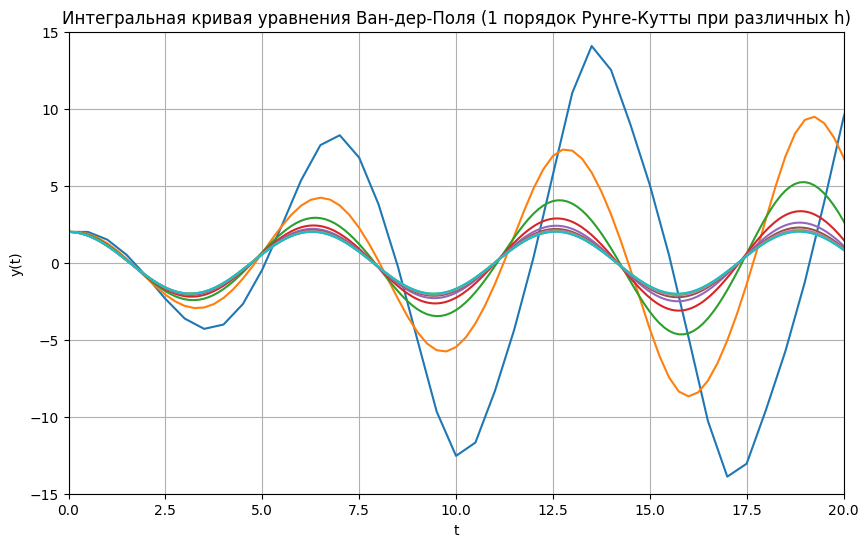

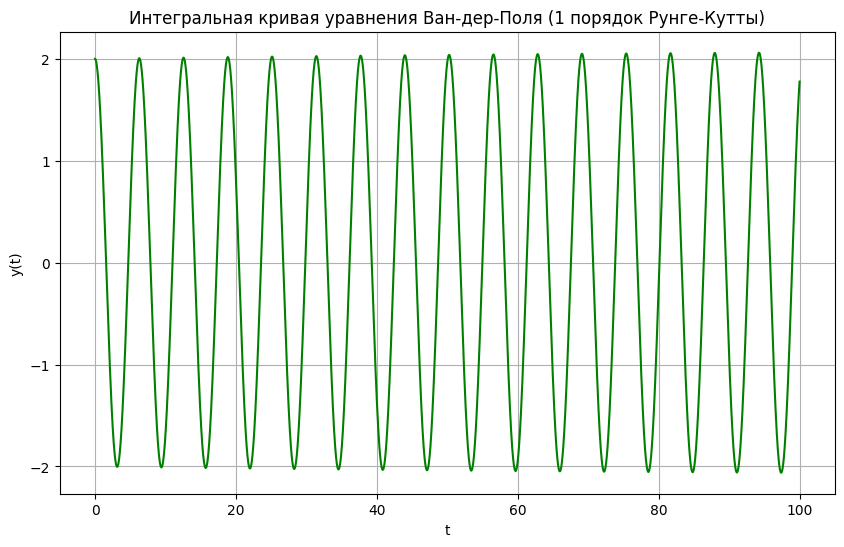

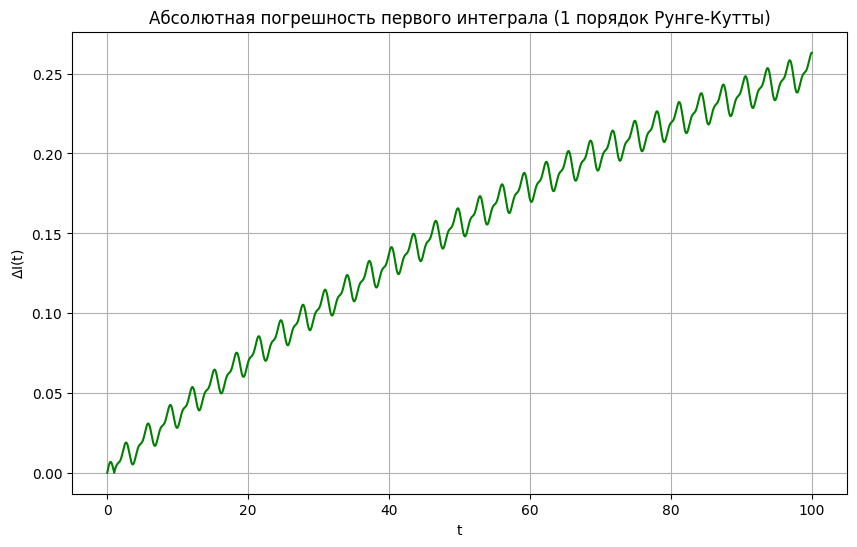

Method order k = 0.7492843970960439


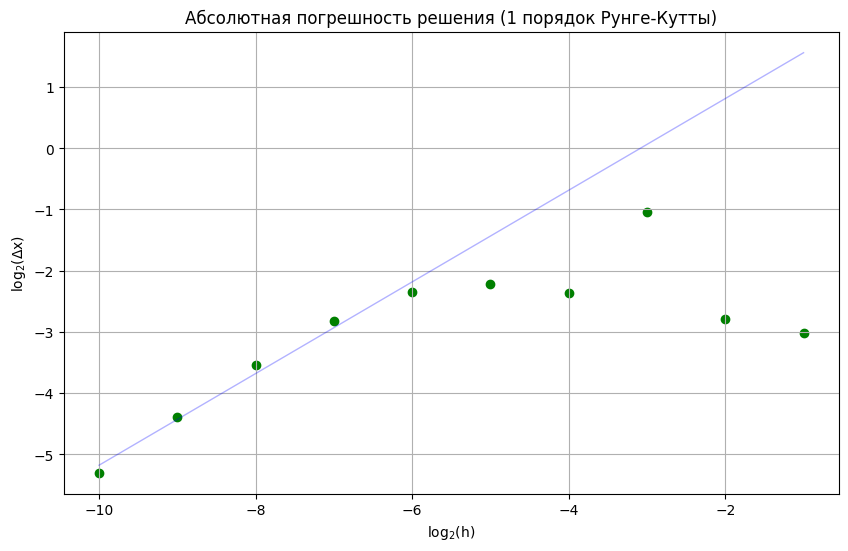

In [4]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1

    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    Delta_I = np.zeros(N + 1)
    Delta_I[0] = 0.0
    
    for i in range(N):
        y_n[i + 1] = y_n[i] + h * f(y_n[i])
        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)

    if k == h_comp:
        y_p[0] = res
        x_p[0] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (1 порядок Рунге-Кутты при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-15, 15))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (1 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()


fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (1 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (1 порядок Рунге-Кутты)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p, v = np.polyfit(np.log2(h_arr)[5:10], np.log2(Delta_x)[5:10], deg=1, cov=True)
pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()


- #### модиф. Эйлер (2 порядок):

$  \begin{cases}
            k_1 = f(x_n, y_n) \\
            k_2 = (x_n + 0.5 h, y_n + 0.5 h k_1) \\
            y_{n+1} = y_n + h(k_2) 
        \end{cases} $

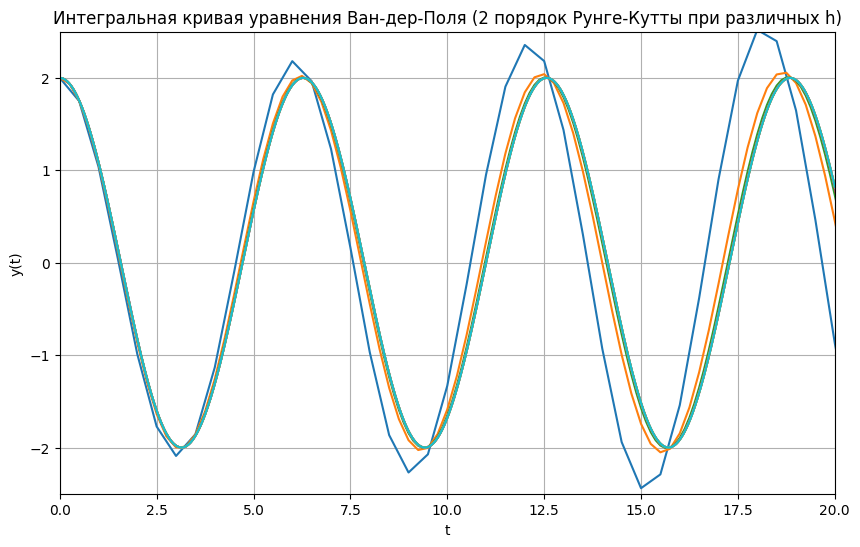

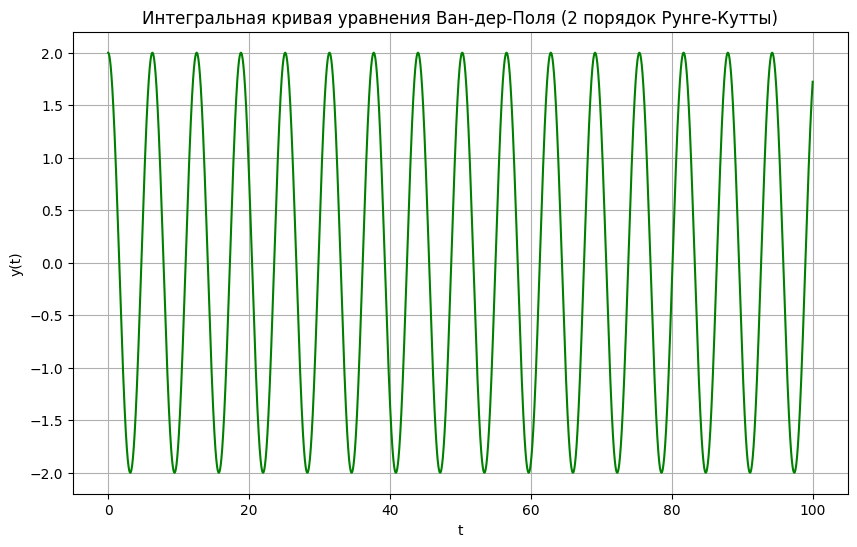

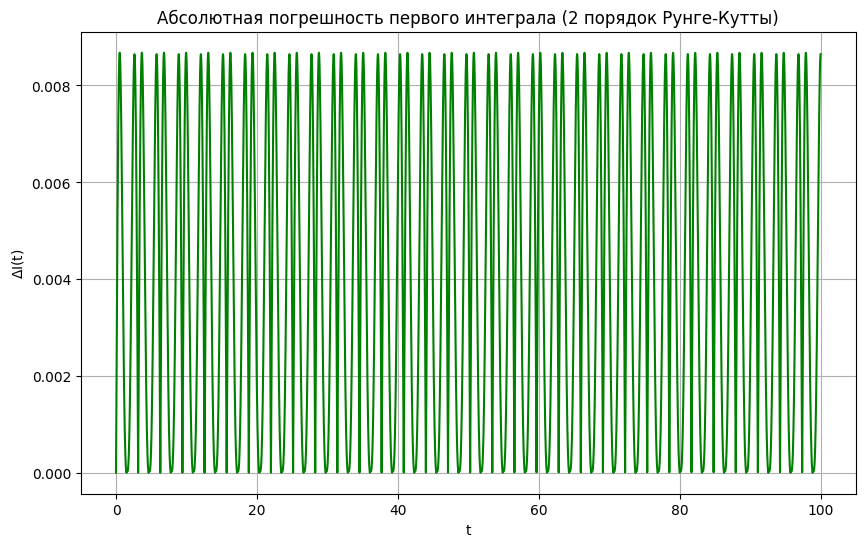

Method order k = 2.51075561809645


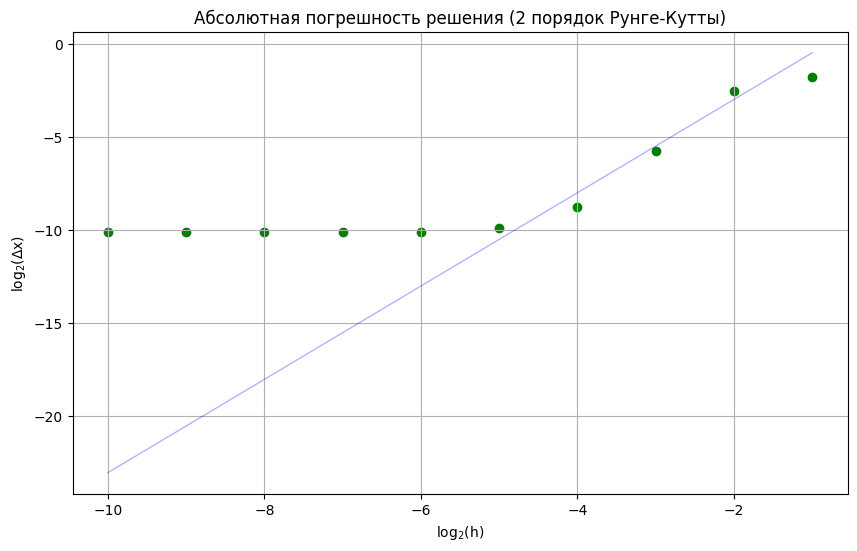

In [5]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    k_1 = np.zeros(2)
    k_2 = np.zeros(2)

    for i in range(N):
        k_1 = f(y_n[i])
        k_2 = f(y_n[i] + 0.5 * h * k_1)
        y_n[i + 1] = y_n[i] + h * k_2

        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[1] = res
        x_p[1] = x_n


plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок Рунге-Кутты при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (2 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (2 порядок Рунге-Кутты)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p, v = np.polyfit(np.log2(h_arr)[1:5], np.log2(Delta_x)[1:5], deg=1, cov=True)
pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()


- #### 3-ий порядок:

$  \begin{cases}
            k_1 = f(x_n, y_n) \\
            k_2 = (x_n + 0.5 h, y_n + 0.5 h k_1) \\
            k_3 = (x_n + h, y_n + h (2k_2 - k_1)) \\
            y_{n+1} = y_n + \frac{h}{6} (k_1 + 4k_2 + k_3)
        \end{cases} $

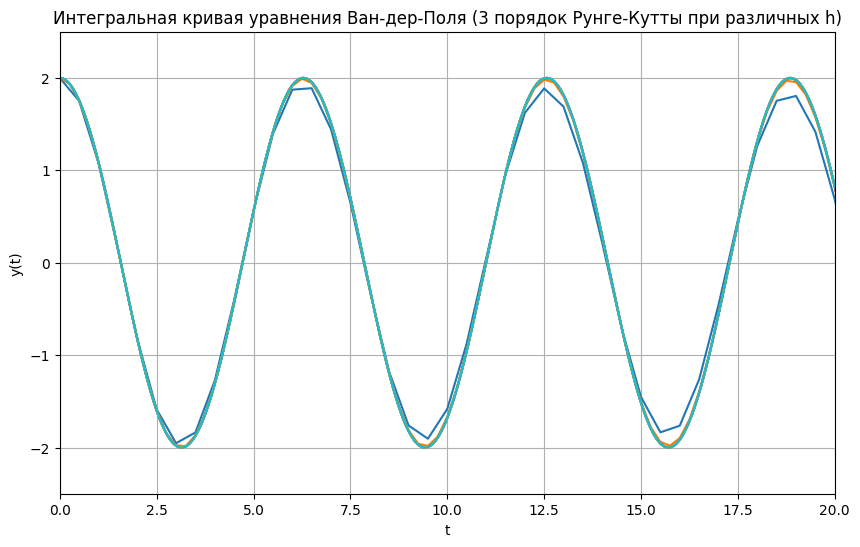

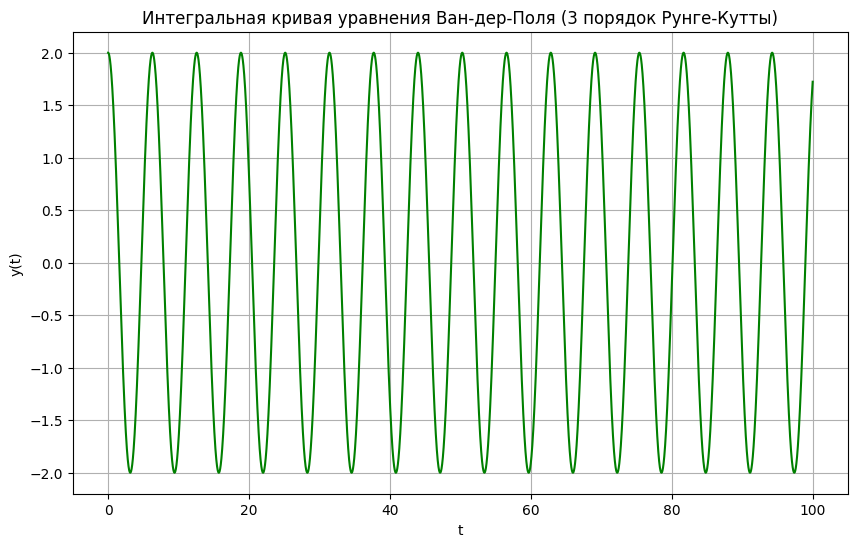

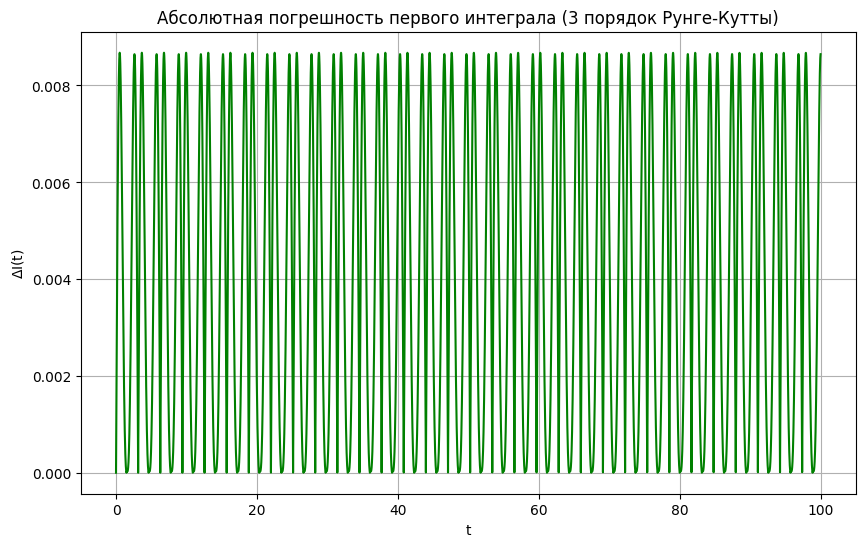

Method order k = 3.4622217288415125


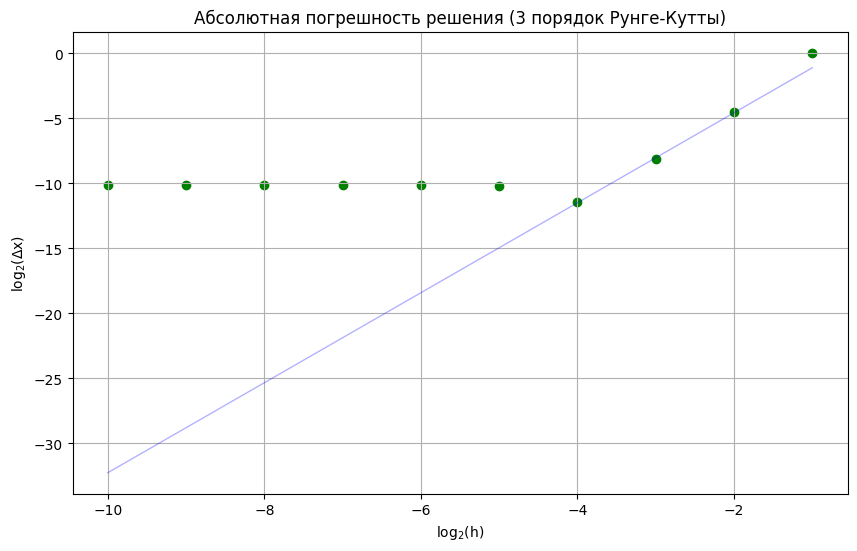

In [6]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1

    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    k_s = np.zeros((3, 2))

    for i in range(N):
        k_s[0] = f(y_n[i])
        k_s[1] = f(y_n[i] + 0.5 * h * k_s[0])
        k_s[2] = f(y_n[i] + h * (2 * k_s[1] - k_s[0]))
        y_n[i + 1] = y_n[i] + (h / 6.0) * (k_s[0] + 4 * k_s[1] + k_s[2])

        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)

    if k == h_comp:
        y_p[2] = res
        x_p[2] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (3 порядок Рунге-Кутты при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (3 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (3 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (3 порядок Рунге-Кутты)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p, v = np.polyfit(np.log2(h_arr)[1:4], np.log2(Delta_x)[1:4], deg=1, cov=True)
pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()


- #### классический Рунге-Кутты (4 порядок):

$  \begin{cases}
            k_1 = f(x_n, y_n) \\
            k_2 = (x_n + 0.5 h, y_n + 0.5 h k_1) \\
            k_3 = (x_n + 0.5 h, y_n + 0.5 h k_2) \\
            k_4 = (x_n + h, y_n + h k_3) \\
            y_{n+1} = y_n + \frac{h}{6} (k_1 + 2k_2 + 2k_3 + k_4)
        \end{cases} $

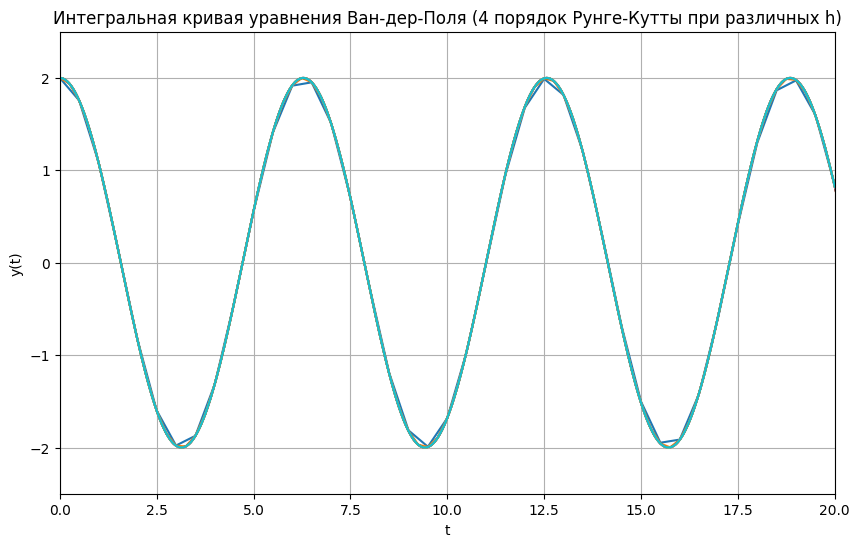

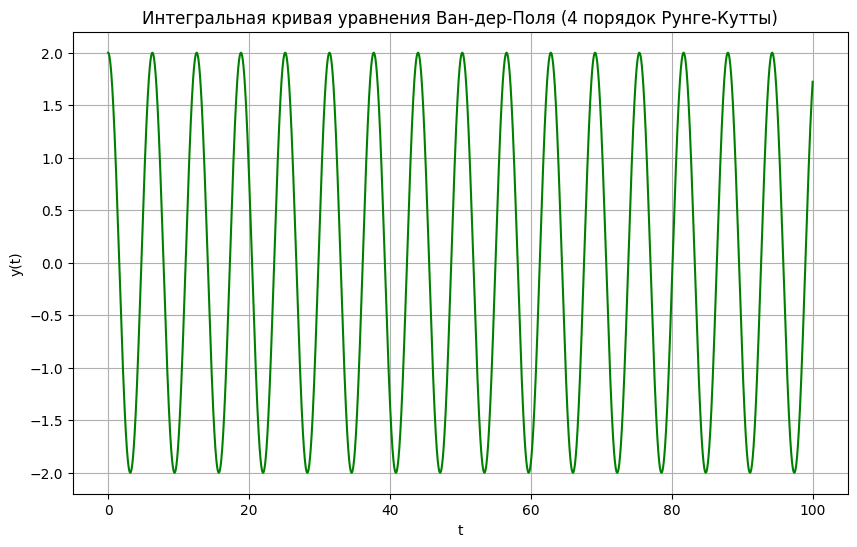

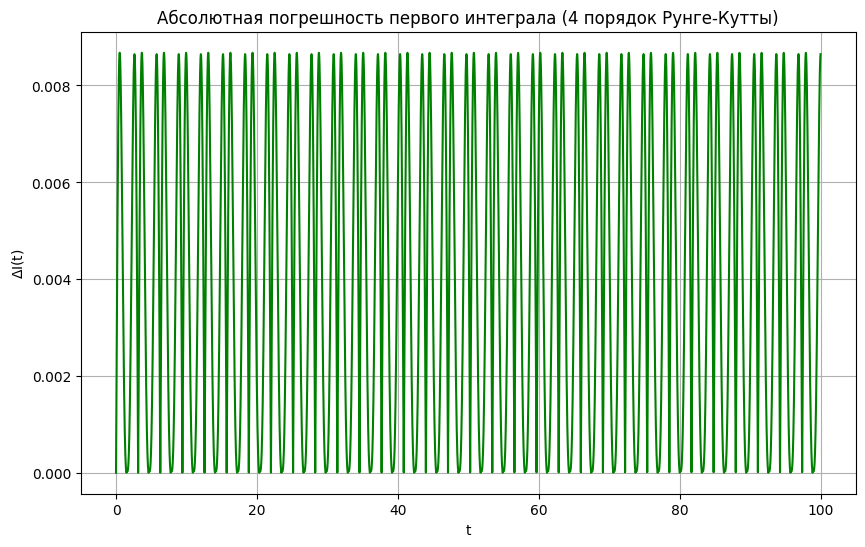

Method order k = 5.546274556128971


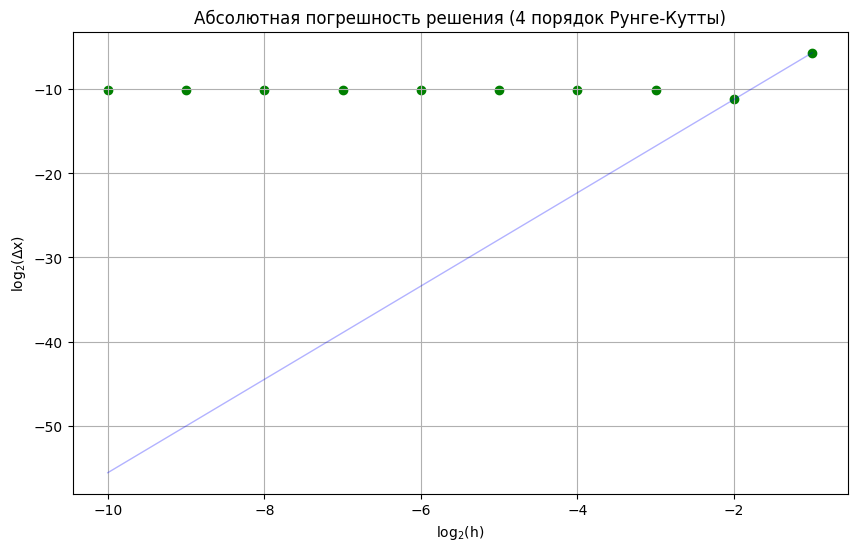

In [7]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    k_s = np.zeros((4, 2))

    for i in range(N):
        k_s[0] = f(y_n[i])
        k_s[1] = f(y_n[i] + 0.5 * h * k_s[0])
        k_s[2] = f(y_n[i] + 0.5 * h * k_s[1])
        k_s[3] = f(y_n[i] + 1.0 * h * k_s[2])
        y_n[i + 1] = y_n[i] + (h / 6.0) * (k_s[0] + 2 * k_s[1] + 2 * k_s[2] + k_s[3])

        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[3] = res
        x_p[3] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (4 порядок Рунге-Кутты при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (4 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()


fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (4 порядок Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (4 порядок Рунге-Кутты)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p[0] = (np.log2(Delta_x)[1] - np.log2(Delta_x)[0]) / (np.log2(h_arr)[1] - np.log2(h_arr)[0])
p[1] = np.log2(Delta_x)[1] - p[0] * np.log2(h_arr)[1]

pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()


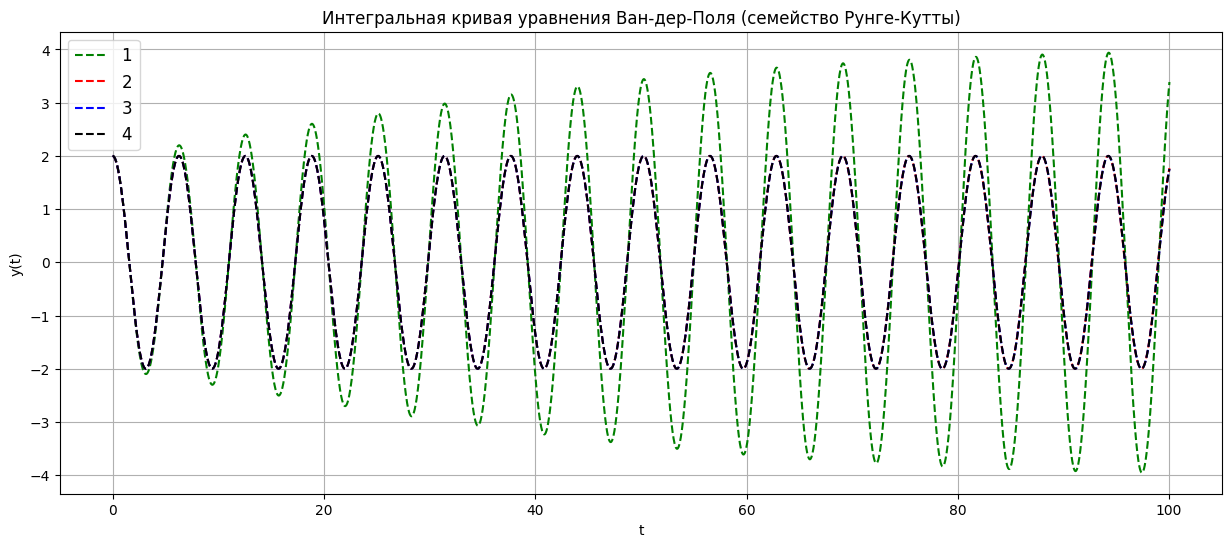

In [8]:
fig = plt.figure(figsize=(15, 6))
plot = fig.add_subplot()
plt.plot(x_p[0], y_p[0], ls = '--', color='green', label = r'$1$' )
plt.plot(x_p[1], y_p[1], ls = '--', color='red'  , label = r'$2$' )
plt.plot(x_p[2], y_p[2], ls = '--', color='blue' , label = r'$3$' )
plt.plot(x_p[3], y_p[3], ls = '--', color='black', label = r'$4$' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (семейство Рунге-Кутты)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

### 2) Методы Адамса-Башфорта 2-4 порядков:
- #### 2 порядок:

$ y_{n + 1} = y_n + \frac{h}{2} \cdot (3f_n - f_{n - 1}) $

In [9]:
h_comp = 5

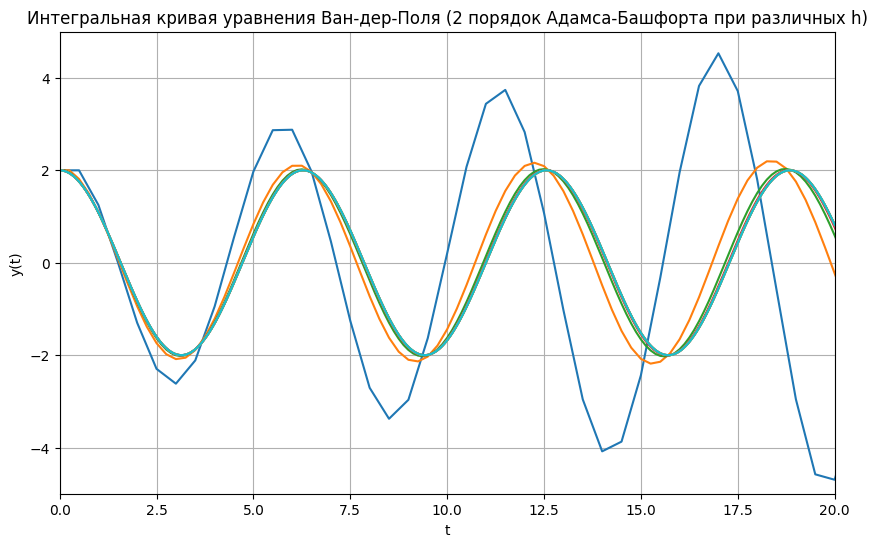

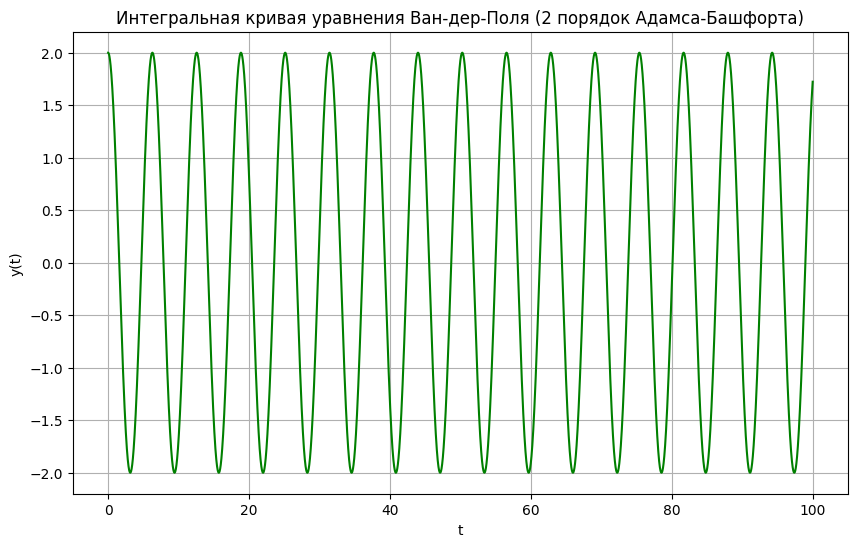

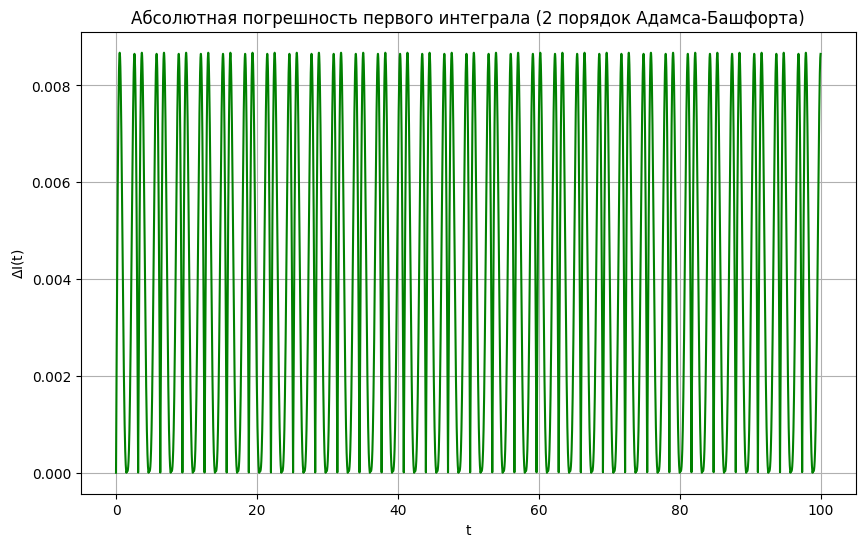

Method order k = 1.844950013773869


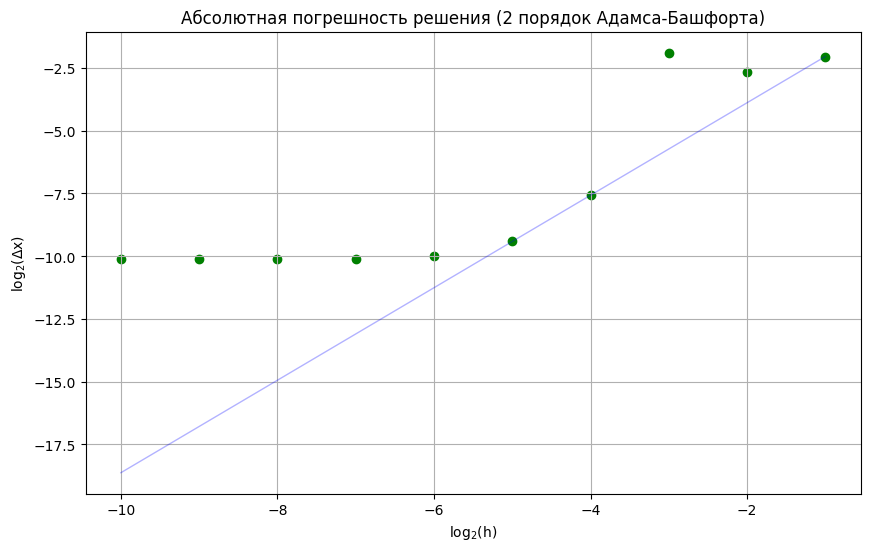

In [10]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    # first step (Euler method):
    y_n[1] = y_n[0] + h * f(y_n[0])
    x_n[1] = x_n[0] + h
    res[1] = y_n[1][0]
    Delta_I[1] = abs(I(y_n[1]) - I_real)

    for i in range(1, N):
        y_n[i + 1] = y_n[i] + (h / 2) * (3 * f(y_n[i]) - f(y_n[i - 1]))

        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[0] = res
        x_p[0] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок Адамса-Башфорта при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-5, 5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (2 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (2 порядок Адамса-Башфорта)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p[0] = (np.log2(Delta_x)[4] - np.log2(Delta_x)[3]) / (np.log2(h_arr)[4] - np.log2(h_arr)[3])
p[1] = np.log2(Delta_x)[4] - p[0] * np.log2(h_arr)[4]

pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()

- #### 3 порядок:

$ y_{n + 1} = y_n + \frac{h}{12} \cdot (23f_n - 16f_{n - 1} + 5f_{n - 2}) $

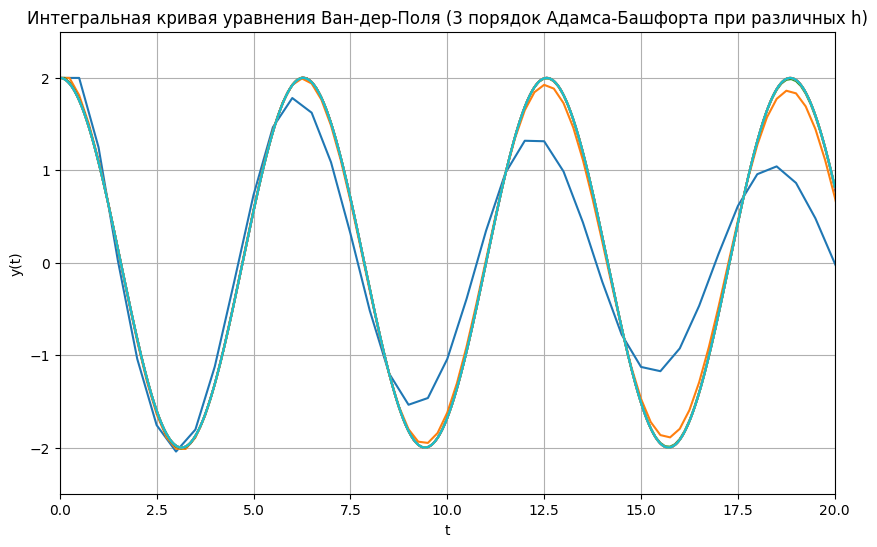

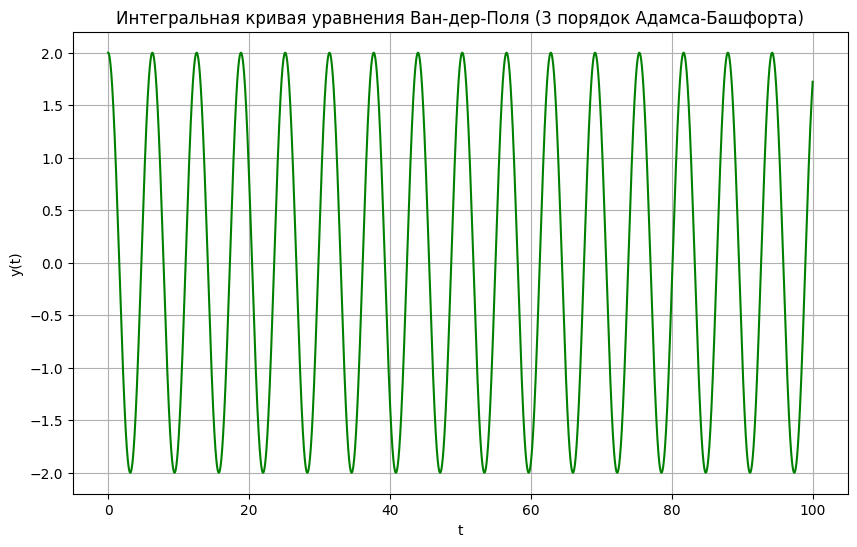

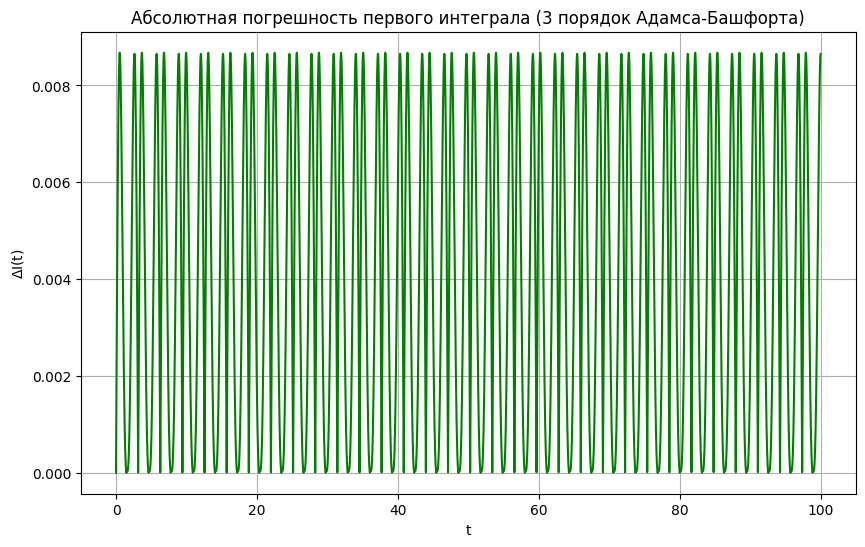

Method order k = 3.5000191812830717


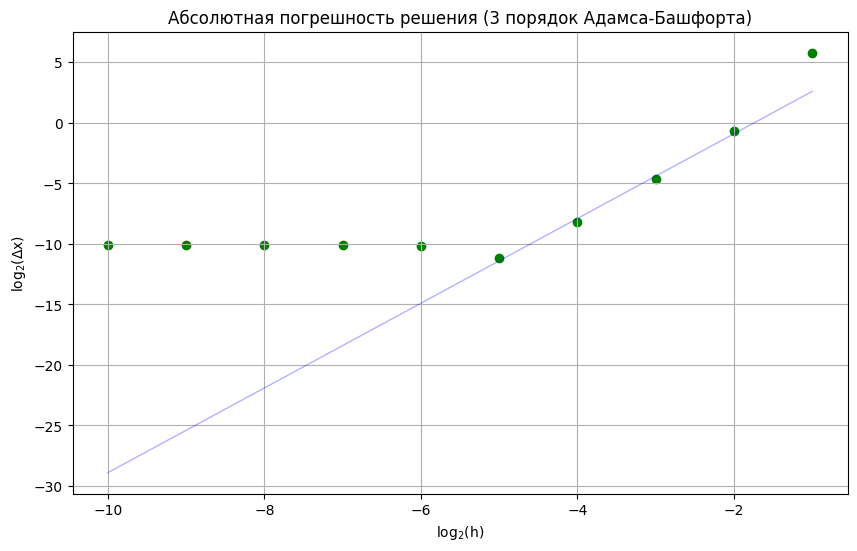

In [11]:
Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    # first step (Euler method):
    y_n[1] = y_n[0] + h * f(y_n[0])
    x_n[1] = x_n[0] + h
    res[1] = y_n[1][0]
    Delta_I[1] = abs(I(y_n[1]) - I_real)

    # second step (Adams-2 method):
    y_n[2] = y_n[1] + (h / 2) * (3 * f(y_n[1]) - f(y_n[0]))
    x_n[2] = x_n[1] + h
    res[2] = y_n[2][0]
    Delta_I[2] = abs(I(y_n[2]) - I_real)

    for i in range(2, N):
        y_n[i + 1] = y_n[i] + (h / 12) * (23 * f(y_n[i]) - 16 * f(y_n[i - 1]) + 5 * f(y_n[i - 2]))
        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[1] = res
        x_p[1] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (3 порядок Адамса-Башфорта при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()


fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (3 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (3 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (3 порядок Адамса-Башфорта)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p, v = np.polyfit(np.log2(h_arr)[1:5], np.log2(Delta_x)[1:5], deg=1, cov=True)

pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()

- #### 4 порядок:

$ y_{n + 1} = y_n + \frac{h}{24} \cdot (55f_n - 59f_{n - 1} + 37f_{n - 2} - 9f_{n - 3}) $

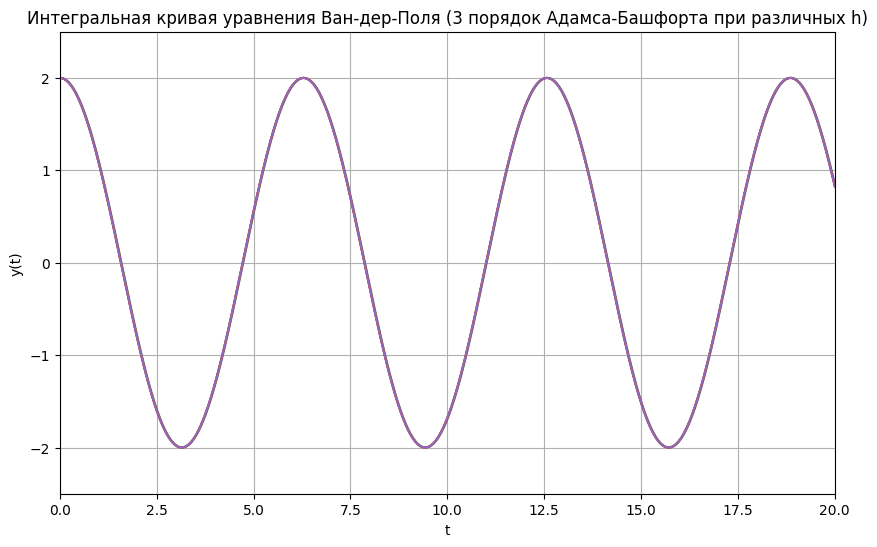

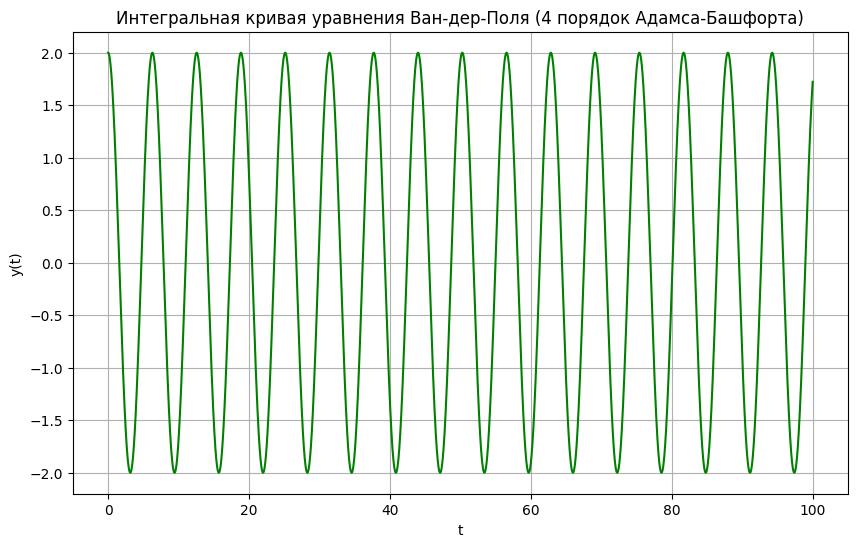

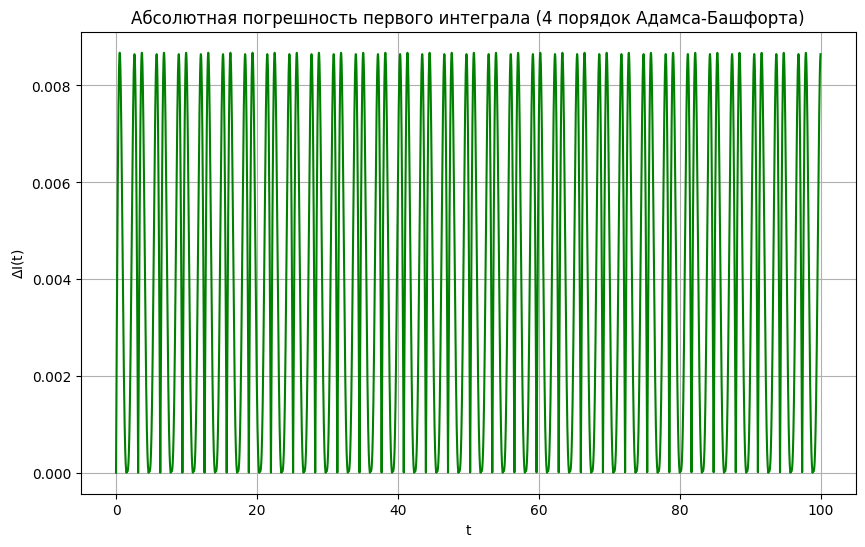

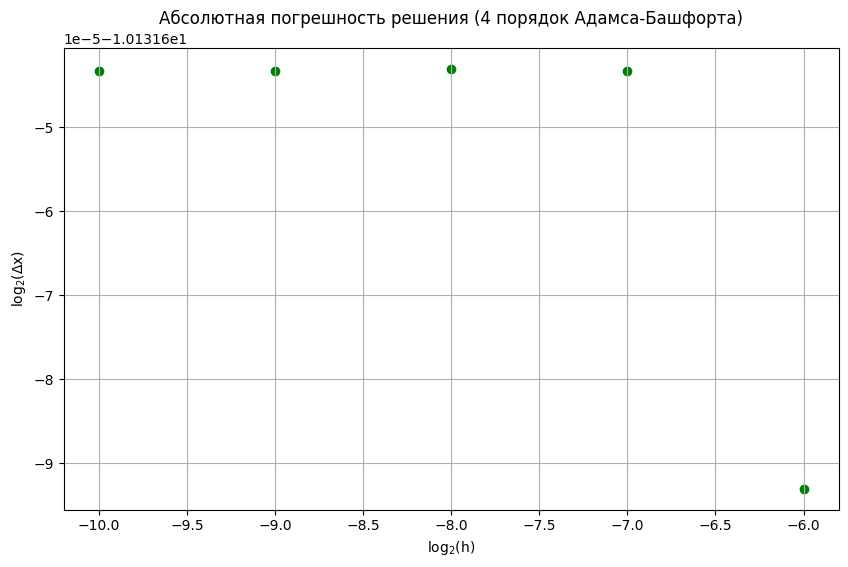

In [12]:
h_arr_tmp = h_arr[5:10]
M = 5

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

Delta_x = np.zeros(M)

for k in range(M):
    h = h_arr_tmp[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    # first step (Euler method):
    y_n[1] = y_n[0] + h * f(y_n[0])
    x_n[1] = x_n[0] + h
    res[1] = y_n[1][0]
    Delta_I[1] = abs(I(y_n[1]) - I_real)

    # second step (Adams-2 method):
    y_n[2] = y_n[1] + (h / 2) * (3 * f(y_n[1]) - f(y_n[0]))
    x_n[2] = x_n[1] + h
    res[2] = y_n[2][0]
    Delta_I[2] = abs(I(y_n[2]) - I_real)

    # third step (Adams-3 method):
    y_n[3] = y_n[1] + (h / 12) * (23 * f(y_n[2]) - 16 * f(y_n[1]) + 5 * f(y_n[0]))
    x_n[3] = x_n[2] + h
    res[3] = y_n[3][0]
    Delta_I[3] = abs(I(y_n[3]) - I_real)


    for i in range(3, N):
        y_n[i + 1] = y_n[i] + (h / 24) * (55 * f(y_n[i]) - 59 * f(y_n[i - 1]) + 37 * f(y_n[i - 2]) - 9 * f(y_n[i - 3]))
        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[2] = res
        x_p[2] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (3 порядок Адамса-Башфорта при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (4 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()


fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (4 порядок Адамса-Башфорта)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr_tmp), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (4 порядок Адамса-Башфорта)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

plt.show()

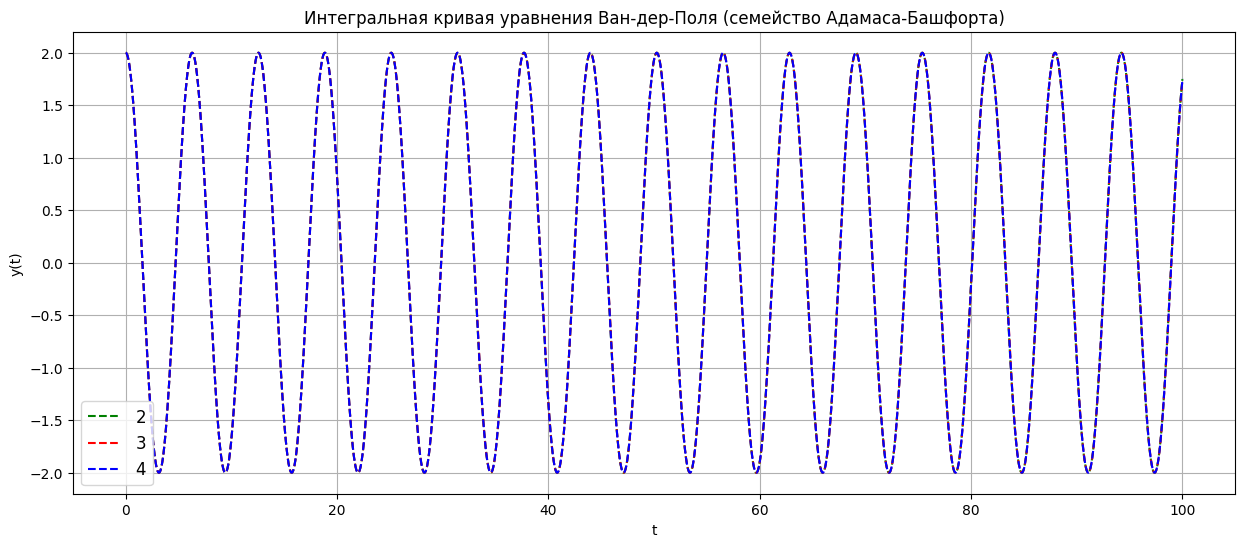

In [13]:
fig = plt.figure(figsize=(15, 6))
plot = fig.add_subplot()
plt.plot(x_p[0], y_p[0], ls = '--', color='green', label = r'$2$' )
plt.plot(x_p[1], y_p[1], ls = '--', color='red'  , label = r'$3$' )
plt.plot(x_p[2], y_p[2], ls = '--', color='blue' , label = r'$4$' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (семейство Адамаса-Башфорта)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

### 3) Формулы дифференцирования назад (ФДН) 2-4 порядков:
- #### 2 порядок:

$y_{n + 1} = y_{n - 1} + 2h \cdot f_n$

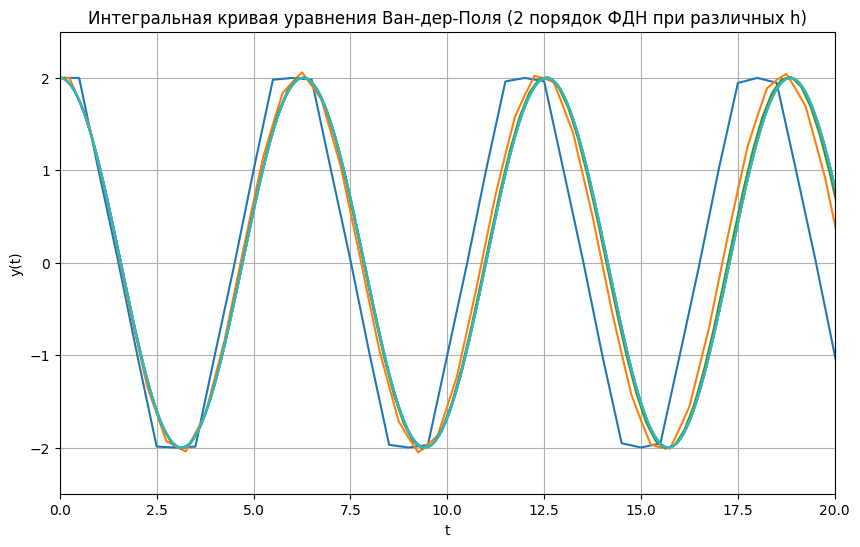

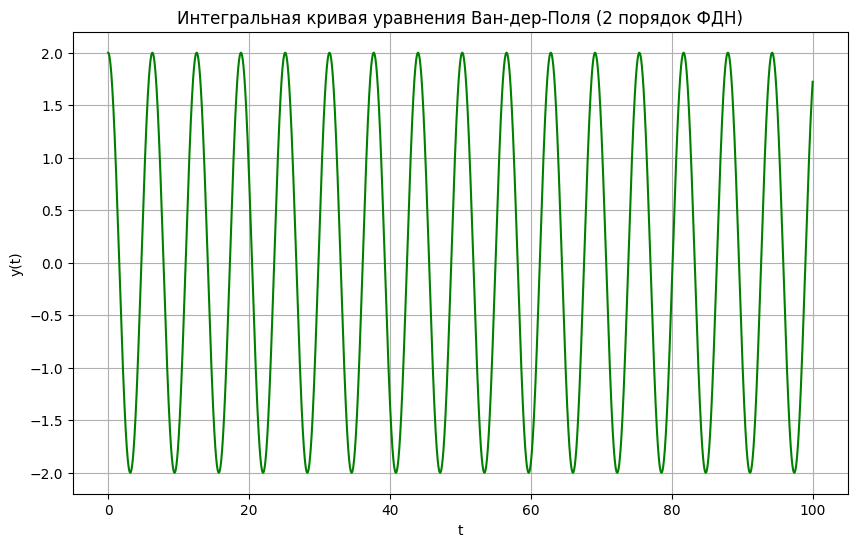

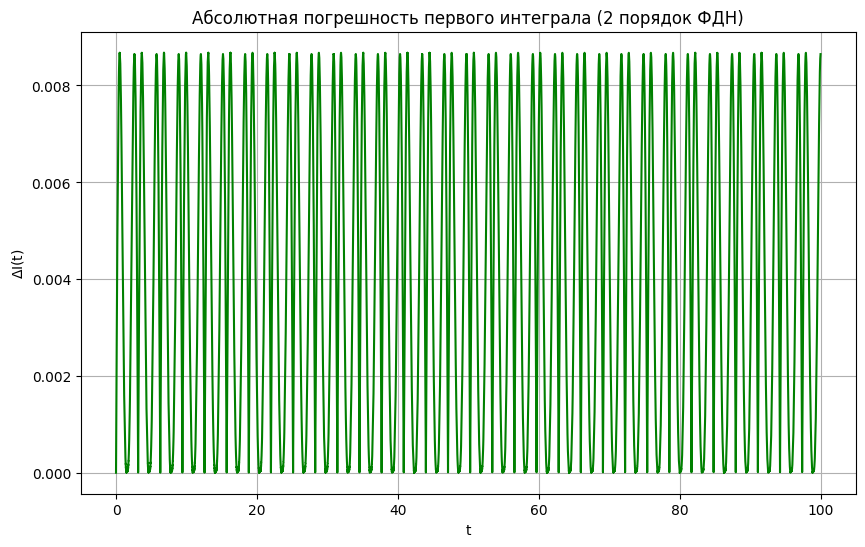

Method order k = 1.958265711749736


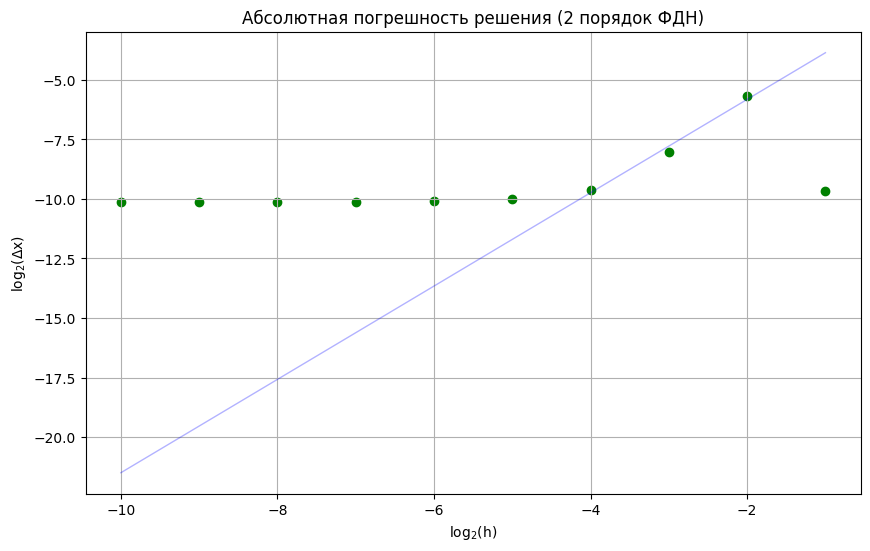

In [14]:
M = 10

Delta_x = np.zeros(M)

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()

for k in range(M):
    h = h_arr[k]
    N = int(max_t / h) + 1
    
    y_n = np.zeros((N + 1, 2))
    y_n[0] = y_0

    x_n = np.zeros(N + 1)
    x_n[0] = 0.0

    res = np.zeros(N + 1)
    res[0] = y_0[0]

    # first step (Euler method):
    y_n[1] = y_n[0] + h * f(y_n[0])
    x_n[1] = x_n[0] + h
    res[1] = y_n[1][0]
    Delta_I[1] = abs(I(y_n[1]) - I_real)

    for i in range(1, N):
        y_n[i + 1] = y_n[i - 1] + 2 * h * f(y_n[i])
    
        x_n[i + 1] = x_n[i] + h
        res[i + 1] = y_n[i + 1][0]
        Delta_I[i + 1] = abs(I(y_n[i + 1]) - I_real)

    Delta_x[k] = dx(y_n[N], Delta_I[N])
    plt.plot(x_n, res)
    
    if k == h_comp:
        y_p[0] = res
        x_p[0] = x_n

plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок ФДН при различных h)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.set(xlim=(0, 20), ylim=(-2.5, 2.5))
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, res, color='green' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (2 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

y_p[1] = res

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.plot(x_n, Delta_I, color='green' )
plt.title('Абсолютная погрешность первого интеграла (2 порядок ФДН)')
plt.xlabel('t')
plt.ylabel('$\Delta$I(t)')
plt.grid()
plt.show()

fig = plt.figure(figsize=(10, 6))
plot = fig.add_subplot()
plt.scatter(np.log2(h_arr), np.log2(Delta_x), color='green' )
plt.title('Абсолютная погрешность решения (2 порядок ФДН)')
plt.xlabel('log$_2$(h)')
plt.ylabel('log$_2$($\Delta$x)')
plt.grid()

p, v = np.polyfit(np.log2(h_arr)[1:4], np.log2(Delta_x)[1:4], deg=1, cov=True)

pf = np.poly1d(p)
plot.plot(np.log2(h_arr), pf(np.log2(h_arr)), ls = '-', lw = 1, c = 'blue', alpha = 0.3 )
print("Method order k =", p[0])
plt.show()

- #### 3 порядок:

$y_{n + 1} = - \frac{3}{2} y_n + 3 y_{n - 1} - \frac{1}{2} y_{n - 2} + 3h \cdot f_n$

- #### 4 порядок:

$y_{n + 1} = - \frac{10}{3} y_n + 6 y_{n - 1} - 2 y_{n - 2} + \frac{1}{3} y_{n - 3} + 4h \cdot f_n$

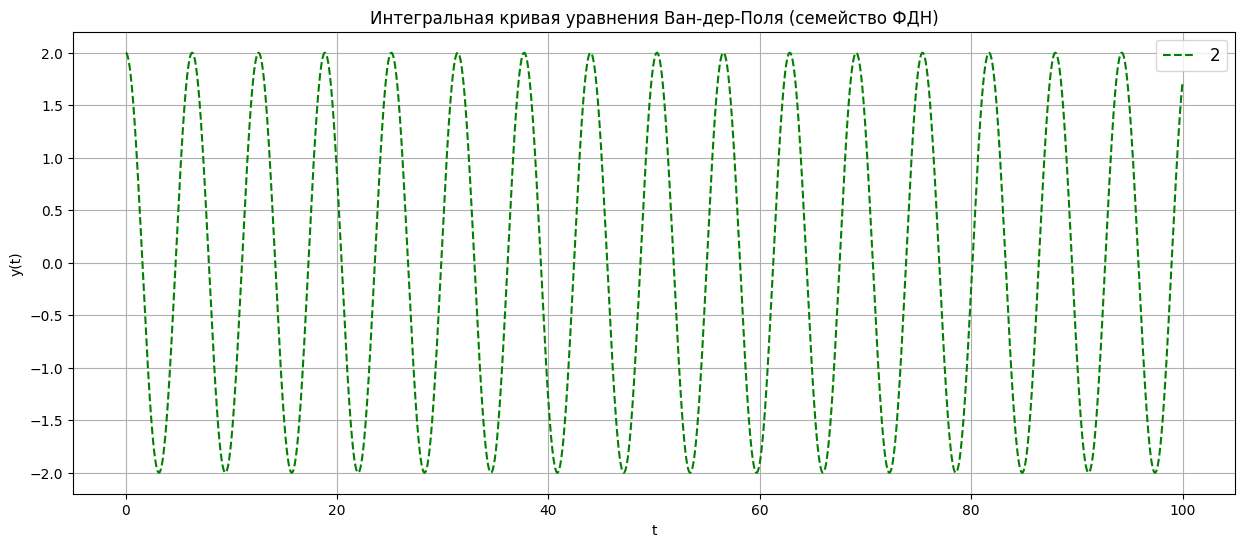

In [15]:
fig = plt.figure(figsize=(15, 6))
plot = fig.add_subplot()
plt.plot(x_n, y_p[1], ls = '--', color='green', label = r'$2$' )
#plt.plot(x_n, y_p[2], ls = '--', color='red'  , label = r'$3$' )
#plt.plot(x_n, y_p[3], ls = '--', color='blue' , label = r'$4$' )
plt.title('Интегральная кривая уравнения Ван-дер-Поля (семейство ФДН)')
plt.xlabel('t')
plt.ylabel('y(t)')
plot.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

## Выводы
В данной лабораторной работе мы решили уравнение Ван-дер-Поля различными явными методами, а также проверили порядок их аппроксимации. Получили следующие значения $ p $:

| Метод | Теоретический порядок | Практический порядок |
|:-----:|:---------------------:|:--------------------:|
| Рунге-Кутта - 1 | 1 | 0.749 |
| Рунге-Кутта - 2 | 2 | 2.511 |
| Рунге-Кутта - 3 | 3 | 3.462 |
| Рунге-Кутта - 4 | 4 | 5.546 |
| Адамс-Башфорт - 2 | 2 | 1.845 |
| Адамс-Башфорт - 3 | 3 | 3.500 |
| Адамс-Башфорт - 4 | 4 | --- |
| ФДН - 2 | 2 | 1.958 |

Видно, что практические значения близки к теоретическим. В случае метода Адамса-Башфорта 4-го порядка не удалось измерить порядок практически по предложенной методике. 

Из семейства ФДН удалось исследовать только метод 2-го порядка, так как методы 3-го и 4-го порядков расходились (скорее всего, это связано с их неустойчивостью).

Общая картина такова: многошаговые методы (Адамс и ФДН) сходятся к решению лучше, чем методы Рунге-Кутты соответствующих порядков (т.е. решения при больших и малых $ h $ не сильно различаются).